In [15]:
import matplotlib.pyplot as plt
from collections import Counter # counts items in a list and creates a dictionary counting the list items
import pandas as pd
import numpy as np

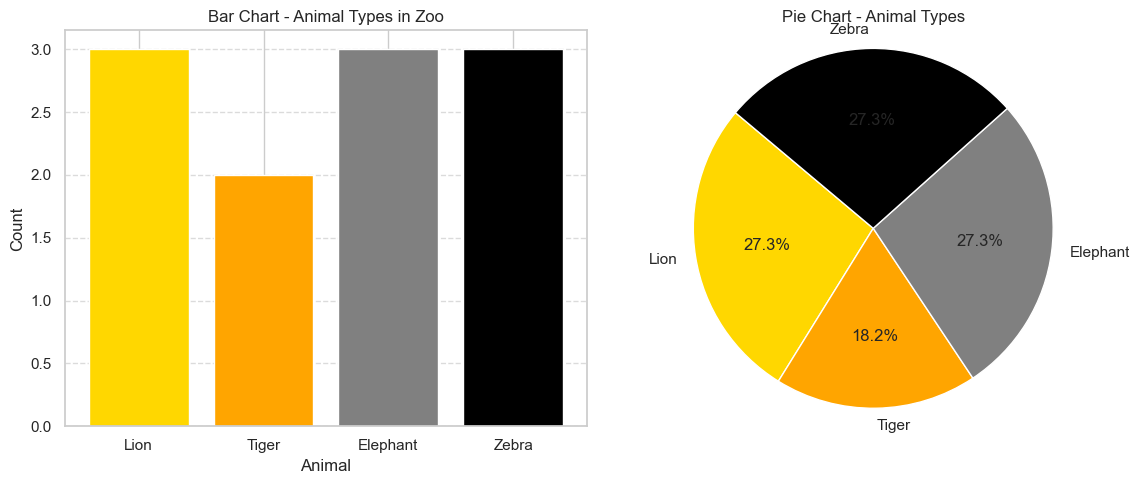

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Sample nominal data: animal types in a zoo
animals = ["Lion", "Tiger", "Elephant", "Tiger", "Lion", "Zebra", "Elephant", "Elephant", "Zebra", "Lion", "Zebra"]

# Count each animal type
animal_counts = Counter(animals)

# Prepare labels and values
labels = list(animal_counts.keys())
values = list(animal_counts.values())

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
ax1.bar(labels, values, color=['gold', 'orange', 'gray', 'black'])
ax1.set_title("Bar Chart - Animal Types in Zoo")
ax1.set_xlabel("Animal")
ax1.set_ylabel("Count")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart
ax2.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'orange', 'gray', 'black'])
ax2.set_title("Pie Chart - Animal Types")
ax2.axis('equal')  # Make pie chart a circle

plt.tight_layout()
plt.show()


response_counts Counter({'High': 90, 'Medium': 60, 'Low': 30})


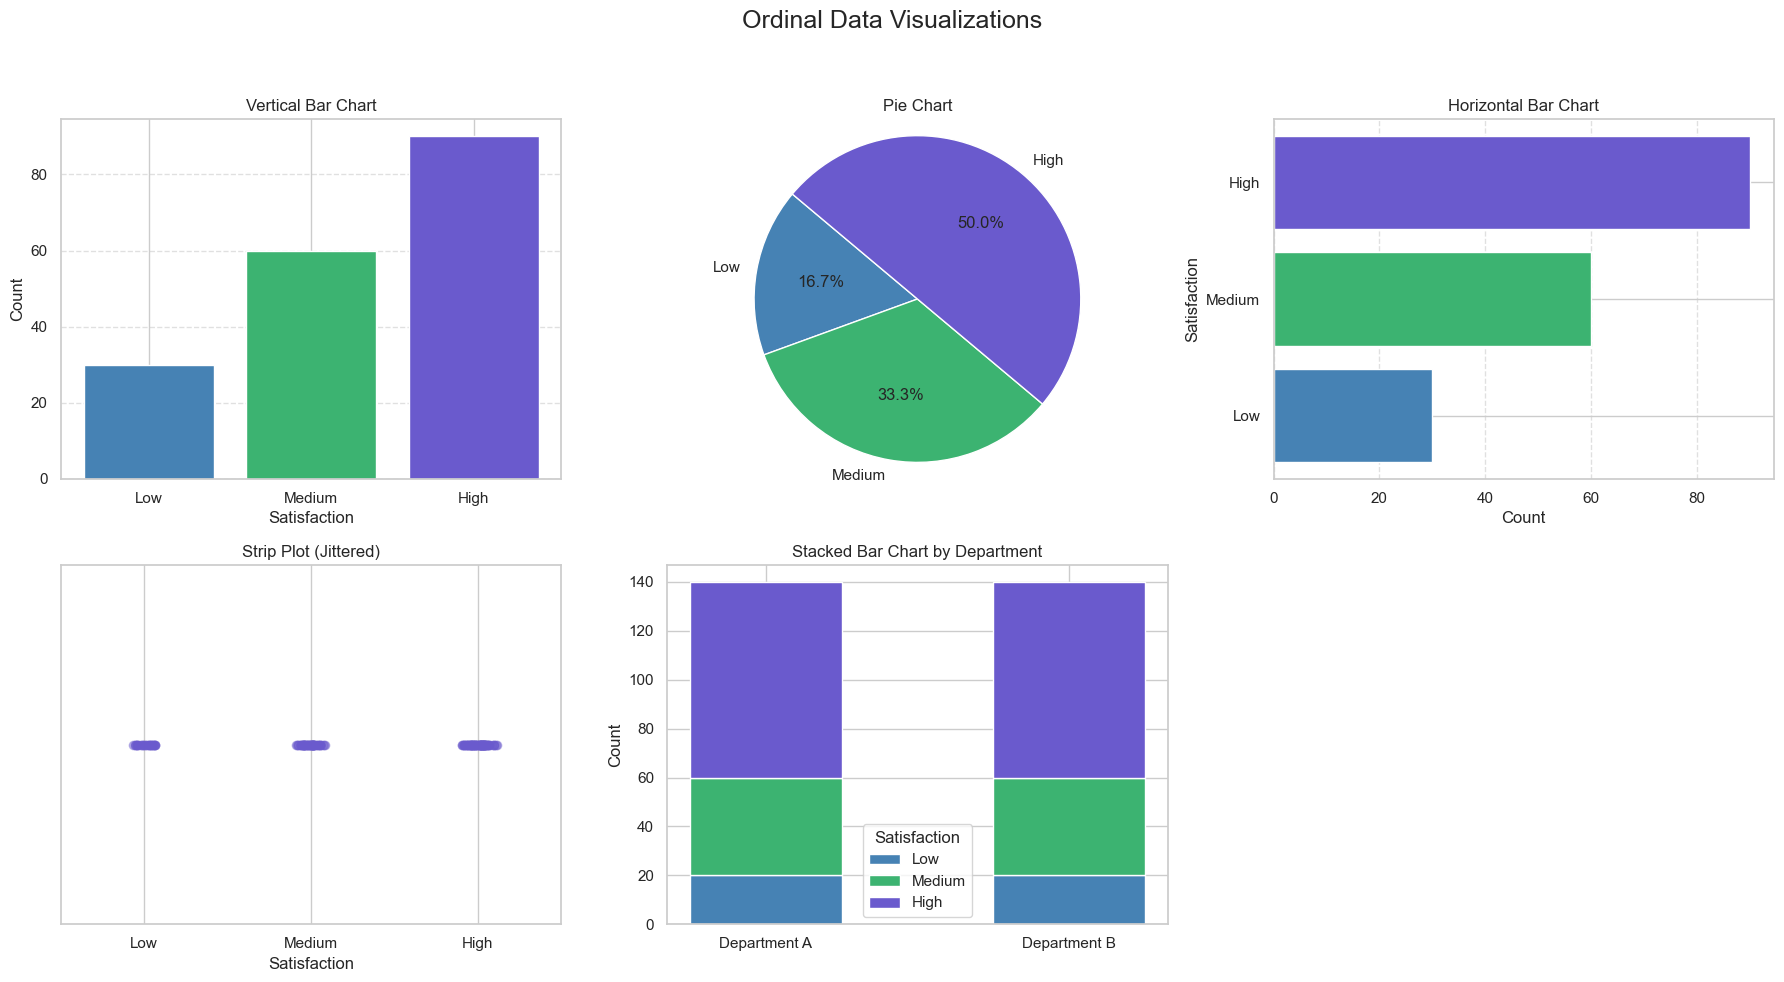

In [23]:
# Sample ordinal data
responses = ["Low"] * 30 + ["Medium"] * 60 + ["High"] * 90
ordered_levels = ["Low", "Medium", "High"]
responses_series = pd.Categorical(responses, categories=ordered_levels, ordered=True)

# Count each level
response_counts = Counter(responses_series)

print("response_counts", response_counts)

labels = ordered_levels
values = [response_counts[level] for level in labels]

# Additional data for strip plot
# Generate 'dots' for each level to simulate individual responses
strip_data = []
for level in ordered_levels:
    strip_data.extend([level] * response_counts[level])
strip_df = pd.DataFrame({"Satisfaction": strip_data})

# Additional data for stacked bar chart: satisfaction across 2 departments
dept_data = {
    "Department A": ["Low"] * 20 + ["Medium"] * 40 + ["High"] * 80,
    "Department B": ["Low"] * 20 + ["Medium"] * 40 + ["High"] * 80,
}
stacked_df = pd.DataFrame(dict([(k, pd.Categorical(v, categories=ordered_levels, ordered=True)) for k, v in dept_data.items()]))

# Prepare stacked bar counts
stacked_counts = pd.DataFrame({dept: stacked_df[dept].value_counts().sort_index() for dept in stacked_df})

# --- Plotting all 5 charts ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Ordinal Data Visualizations", fontsize=18)

# 1. Vertical Bar Chart
axes[0, 0].bar(labels, values, color=['steelblue', 'mediumseagreen', 'slateblue'])
axes[0, 0].set_title("Vertical Bar Chart")
axes[0, 0].set_xlabel("Satisfaction")
axes[0, 0].set_ylabel("Count")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Pie Chart
axes[0, 1].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['steelblue', 'mediumseagreen', 'slateblue'])
axes[0, 1].set_title("Pie Chart")
axes[0, 1].axis('equal')

# 3. Horizontal Bar Chart
axes[0, 2].barh(labels, values, color=['steelblue', 'mediumseagreen', 'slateblue'])
axes[0, 2].set_title("Horizontal Bar Chart")
axes[0, 2].set_xlabel("Count")
axes[0, 2].set_ylabel("Satisfaction")
axes[0, 2].grid(axis='x', linestyle='--', alpha=0.6)

# 4. Strip Plot (jittered)
# Add jitter on x-axis to separate dots
jitter = np.random.normal(0, 0.05, size=len(strip_df))
ordinal_mapping = {k: v for v, k in enumerate(ordered_levels)}
strip_df["x"] = [ordinal_mapping[val] + jitter[i] for i, val in enumerate(strip_df["Satisfaction"])]
strip_df["y"] = [1] * len(strip_df)  # constant y to simulate jitter

axes[1, 0].plot(strip_df["x"], strip_df["y"], 'o', alpha=0.4, markersize=6, color='slateblue')
axes[1, 0].set_title("Strip Plot (Jittered)")
axes[1, 0].set_yticks([])
axes[1, 0].set_xticks(list(ordinal_mapping.values()))
axes[1, 0].set_xticklabels(ordered_levels)
axes[1, 0].set_xlabel("Satisfaction")
axes[1, 0].set_xlim(-0.5, 2.5)

# 5. Stacked Bar Chart
bar_width = 0.5
x = np.arange(len(stacked_counts.columns))
bottom = np.zeros(len(x))

for idx, level in enumerate(ordered_levels):
    counts = stacked_counts.loc[level]
    axes[1, 1].bar(x, counts, bar_width, label=level, bottom=bottom, color=['steelblue', 'mediumseagreen', 'slateblue'][idx])
    bottom += counts

axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(stacked_counts.columns)
axes[1, 1].set_title("Stacked Bar Chart by Department")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Satisfaction")

# Hide the 6th subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


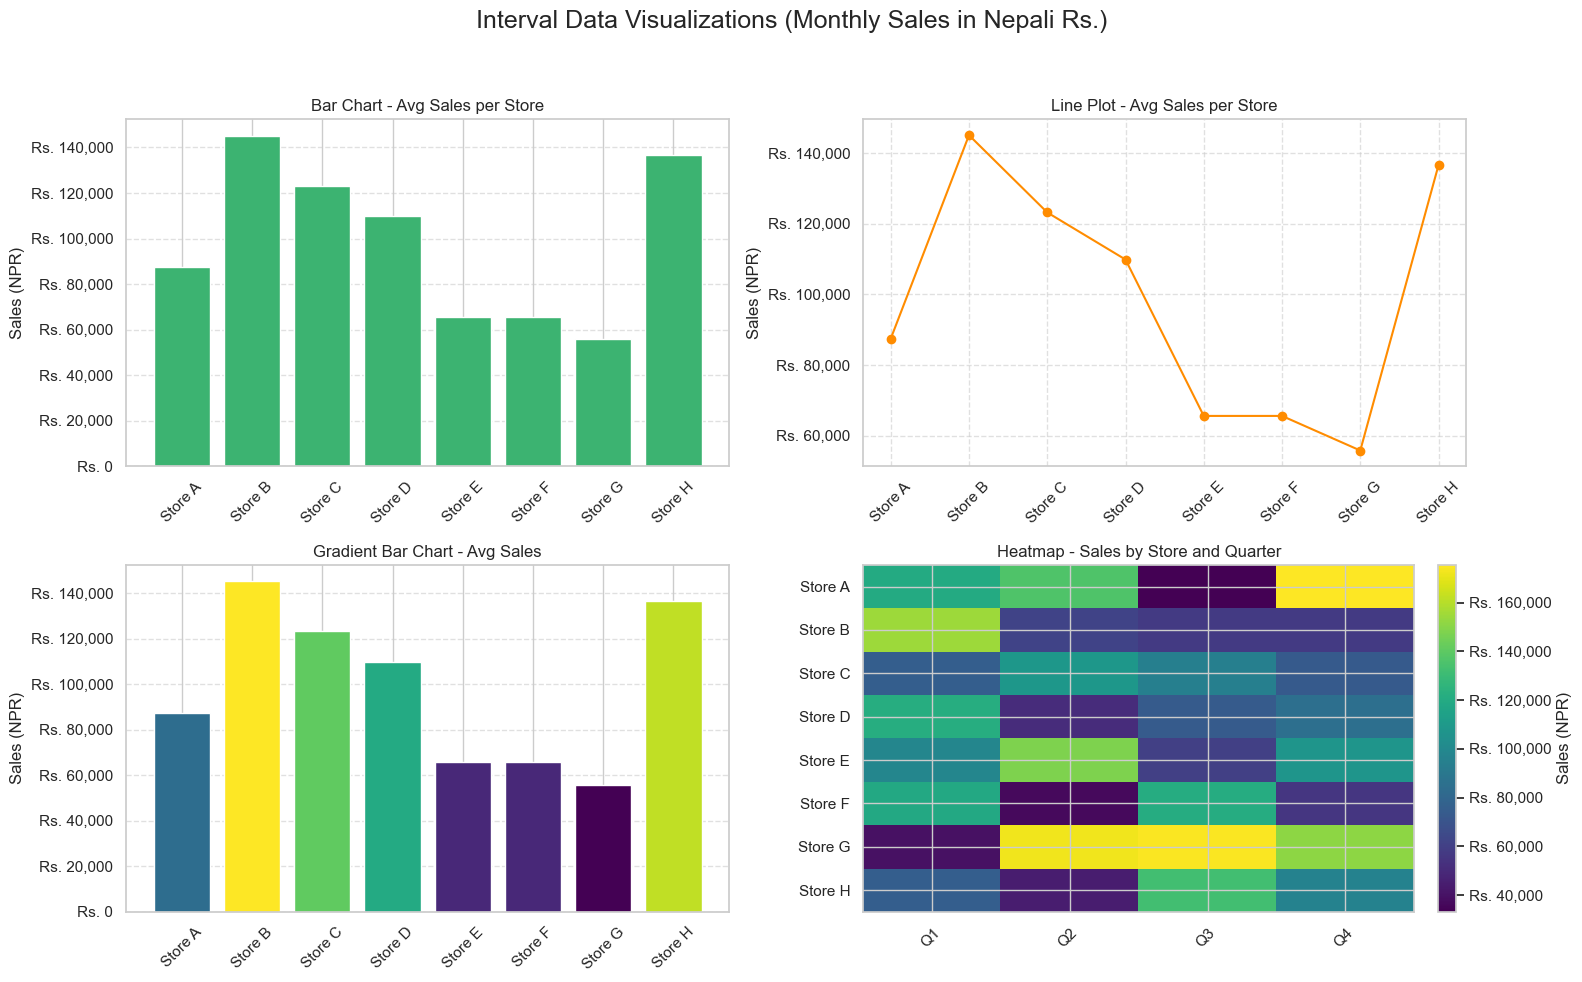

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Stores and quarters
stores = ["Store A", "Store B", "Store C", "Store D", "Store E", "Store F", "Store G", "Store H"]
quarters = ["Q1", "Q2", "Q3", "Q4"]

# Single sales values per store (1D plots)
np.random.seed(42)
store_sales = np.random.uniform(50000, 150000, size=len(stores))  # sales in NPR

# 2D sales matrix (stores × quarters)
sales_matrix = np.random.uniform(30000, 180000, size=(len(stores), len(quarters)))

# Normalize for gradient coloring
norm_values = (store_sales - min(store_sales)) / (max(store_sales) - min(store_sales))
gradient_colors = plt.cm.viridis(norm_values)  # using viridis colormap for variety

# Formatter for Nepali Rs. with commas and Rs. prefix
def nepali_rs_formatter(x, pos):
    return f'Rs. {int(x):,}'

formatter = mtick.FuncFormatter(nepali_rs_formatter)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Interval Data Visualizations (Monthly Sales in Nepali Rs.)", fontsize=18)

# 1. Vertical Bar Chart
axes[0, 0].bar(stores, store_sales, color='mediumseagreen')
axes[0, 0].set_title("Bar Chart - Avg Sales per Store")
axes[0, 0].set_ylabel("Sales (NPR)")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0, 0].yaxis.set_major_formatter(formatter)

# 2. Line Plot
axes[0, 1].plot(stores, store_sales, marker='o', linestyle='-', color='darkorange')
axes[0, 1].set_title("Line Plot - Avg Sales per Store")
axes[0, 1].set_ylabel("Sales (NPR)")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)
axes[0, 1].yaxis.set_major_formatter(formatter)

# 3. Gradient-colored Bar Chart
axes[1, 0].bar(stores, store_sales, color=gradient_colors)
axes[1, 0].set_title("Gradient Bar Chart - Avg Sales")
axes[1, 0].set_ylabel("Sales (NPR)")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)
axes[1, 0].yaxis.set_major_formatter(formatter)

# 4. Heatmap: Store × Quarter Sales
heatmap = axes[1, 1].imshow(sales_matrix, cmap='viridis', aspect='auto')
axes[1, 1].set_xticks(np.arange(len(quarters)))
axes[1, 1].set_yticks(np.arange(len(stores)))
axes[1, 1].set_xticklabels(quarters)
axes[1, 1].set_yticklabels(stores)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
axes[1, 1].set_title("Heatmap - Sales by Store and Quarter")

# Colorbar formatter for heatmap
cbar = fig.colorbar(heatmap, ax=axes[1, 1], orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Sales (NPR)")
cbar.ax.yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


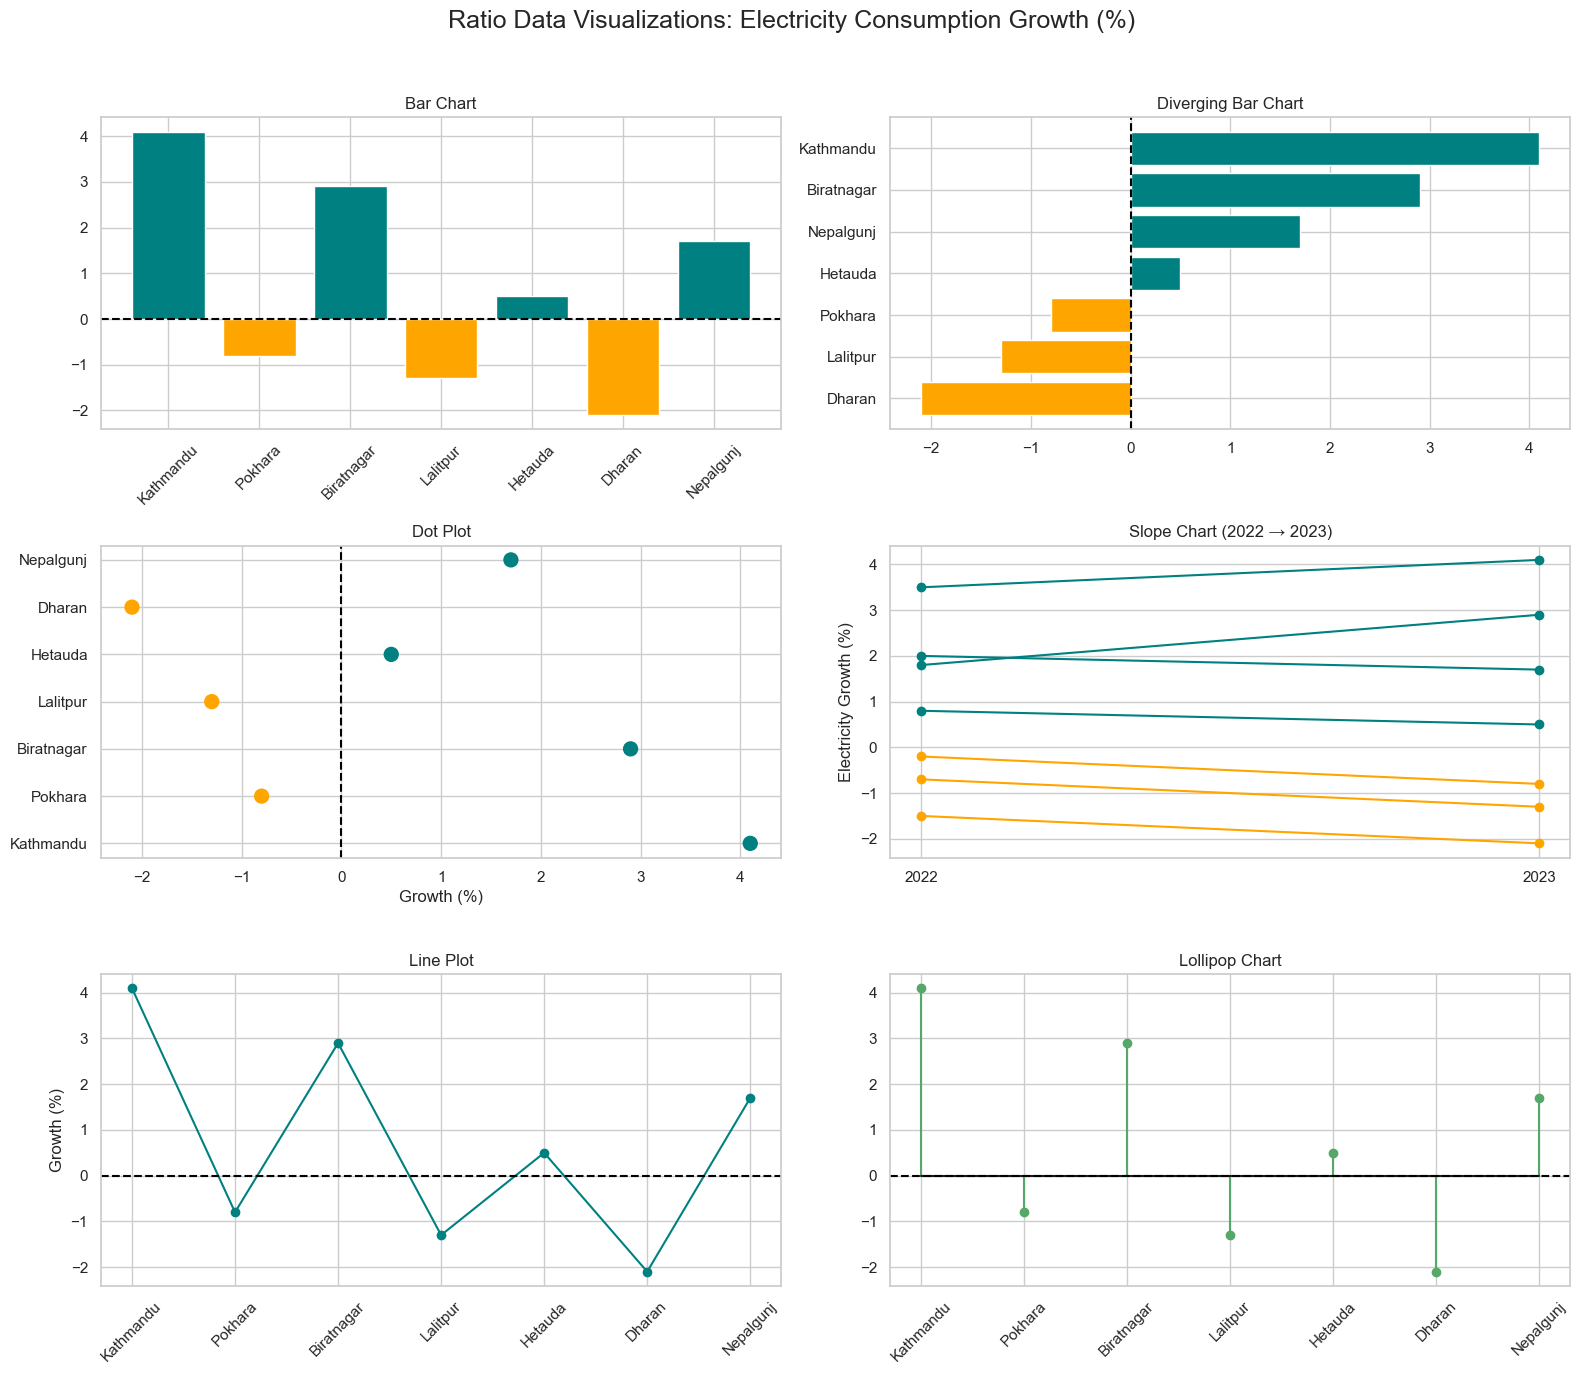

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Cities and electricity consumption growth (%)
cities = ["Kathmandu", "Pokhara", "Biratnagar", "Lalitpur", "Hetauda", "Dharan", "Nepalgunj"]
elec_growth = [4.1, -0.8, 2.9, -1.3, 0.5, -2.1, 1.7]
colors = ['teal' if val > 0 else 'orange' if val < 0 else 'gray' for val in elec_growth]
x_pos = np.arange(len(cities))

# Growth in 2022 and 2023 (fictional data)
elec_2022 = [3.5, -0.2, 1.8, -0.7, 0.8, -1.5, 2.0]
elec_2023 = elec_growth

# --- Create all subplots ---
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Ratio Data Visualizations: Electricity Consumption Growth (%)", fontsize=18)

# 1. Bar Chart
axes[0, 0].bar(cities, elec_growth, color=colors)
axes[0, 0].set_title("Bar Chart")
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Diverging Bar Chart
sorted_data = sorted(zip(cities, elec_growth), key=lambda x: x[1])
sorted_cities = [x[0] for x in sorted_data]
sorted_growth = [x[1] for x in sorted_data]
sorted_colors = ['teal' if val > 0 else 'orange' if val < 0 else 'gray' for val in sorted_growth]
axes[0, 1].barh(sorted_cities, sorted_growth, color=sorted_colors)
axes[0, 1].axvline(0, color='black', linestyle='--')
axes[0, 1].set_title("Diverging Bar Chart")

# 3. Dot Plot
axes[1, 0].scatter(elec_growth, cities, color=colors, s=100)
axes[1, 0].axvline(0, color='black', linestyle='--')
axes[1, 0].set_title("Dot Plot")
axes[1, 0].set_xlabel("Growth (%)")

# 4. Slope Chart (2022 vs 2023)
for i in range(len(cities)):
    axes[1, 1].plot([2022, 2023], [elec_2022[i], elec_2023[i]], marker='o', label=cities[i], color=colors[i])
axes[1, 1].set_xticks([2022, 2023])
axes[1, 1].set_title("Slope Chart (2022 → 2023)")
axes[1, 1].set_ylabel("Electricity Growth (%)")

# 5. Line Chart
axes[2, 0].plot(cities, elec_growth, marker='o', linestyle='-', color='teal')
axes[2, 0].axhline(0, color='black', linestyle='--')
axes[2, 0].set_title("Line Plot")
axes[2, 0].set_ylabel("Growth (%)")
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Lollipop Chart
axes[2, 1].stem(x_pos, elec_growth, linefmt='C2-', markerfmt='C2o', basefmt="k-")  # C2 = teal-ish
axes[2, 1].set_xticks(x_pos)
axes[2, 1].set_xticklabels(cities, rotation=45)
axes[2, 1].axhline(0, color='black', linestyle='--')
axes[2, 1].set_title("Lollipop Chart")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
